In [1]:
import warnings
warnings.filterwarnings('ignore')
from icecream import ic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scale
from sklearn.preprocessing import StandardScaler

# KMeans Clustering
from sklearn.cluster import KMeans

# Hierarchial Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Load data set
df = pd.read_csv("Country-data.csv")
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
# Check the rows and columns
df.shape

(167, 10)

In [4]:
# Check if there are any missing values i.e. null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Since there the rows are 167 and the non-null values are 167, we can conclude that there are no missing values.

In [5]:
#Checking the statistics of the data set
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [6]:
# Convert exports, imports and health  percentages to absolute values as it is given as %age of the GDP per capita
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [7]:
#Checking if the change got reflected
df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### Univariate Analysis

In [8]:
#Since country is not a Numeric value, excluding it for the analysis.
col = df.columns[1:]

In [9]:
list(enumerate(col))

[(0, 'child_mort'),
 (1, 'exports'),
 (2, 'health'),
 (3, 'imports'),
 (4, 'income'),
 (5, 'inflation'),
 (6, 'life_expec'),
 (7, 'total_fer'),
 (8, 'gdpp')]

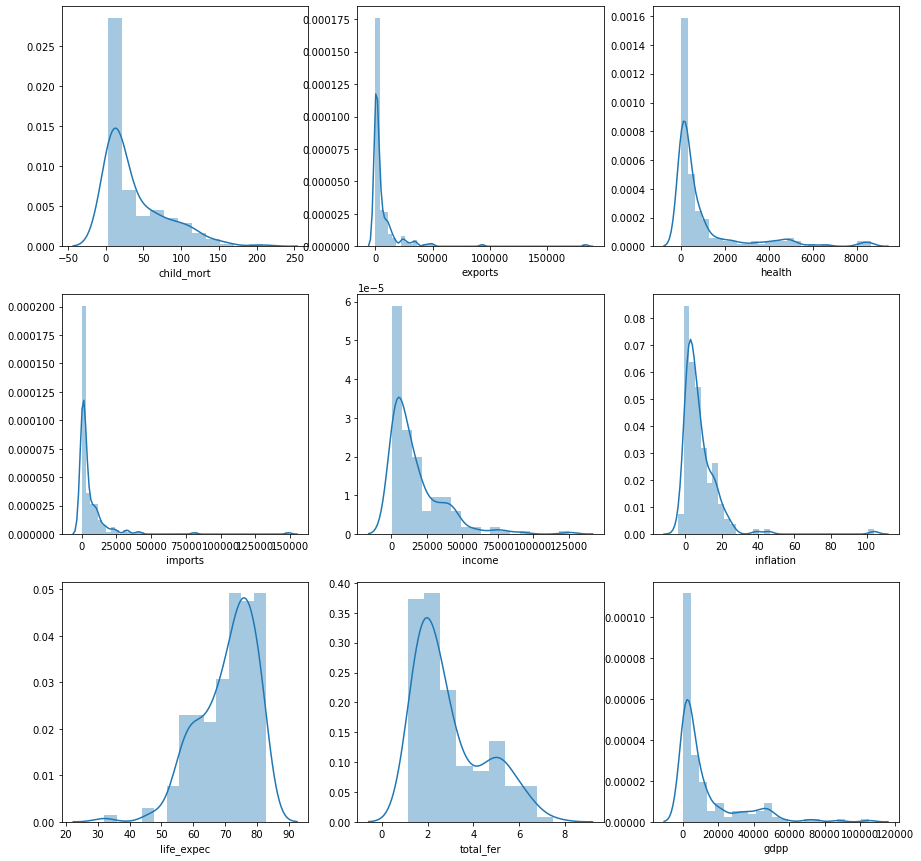

In [10]:
# We can start by plotting the data using scatter plots, to check the distribution of each column
plt.figure(figsize = (15,15))
for i in enumerate(col):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]])

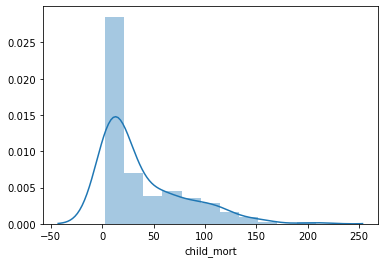

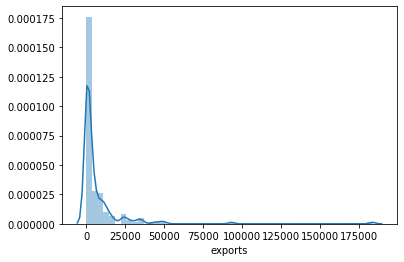

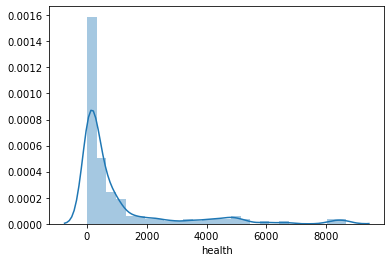

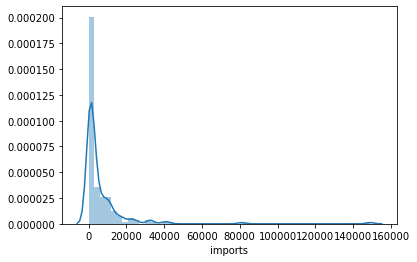

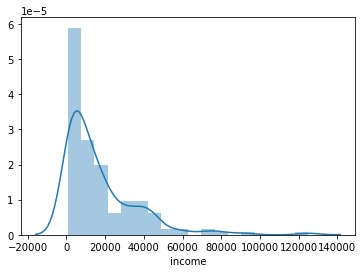

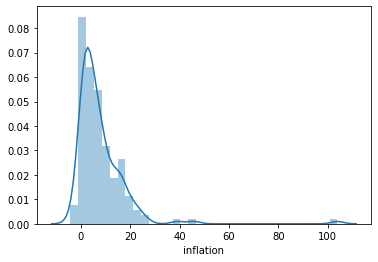

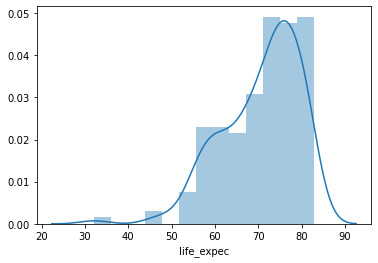

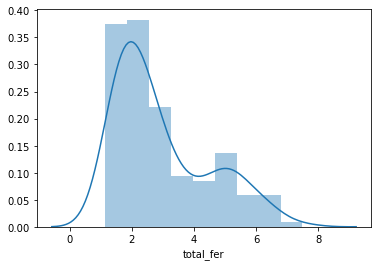

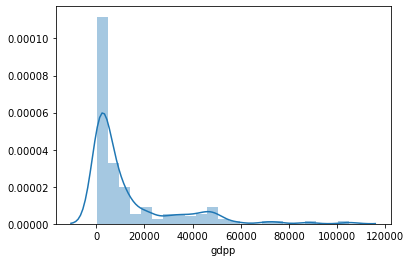

In [11]:
# distplot

for c in col:
    sns.distplot(df[c])
    plt.show();

We can see that 

### Multivariate Analysis


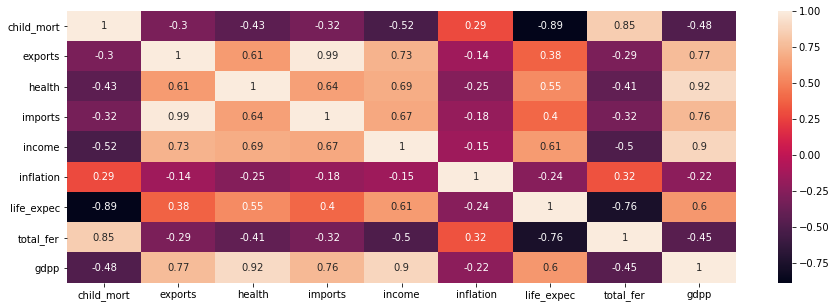

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(df[col].corr(), annot=True);

## Outlier Treatment

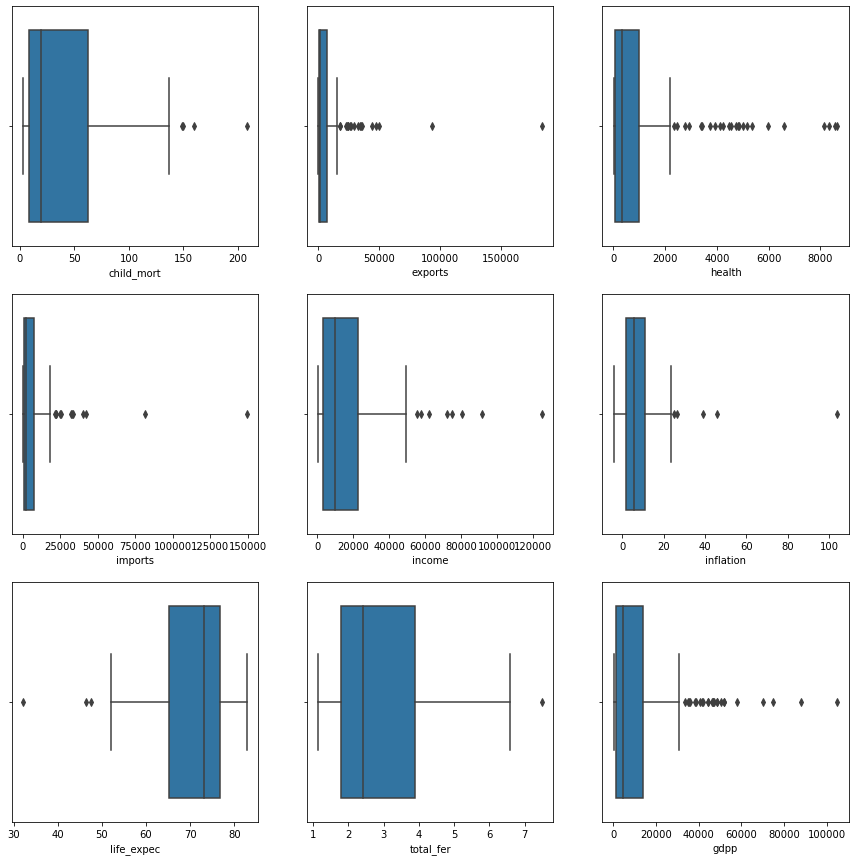

In [13]:
# We can start by plotting the data using box plots
plt.figure(figsize = (15,15))
for i in enumerate(col):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(x = i[1], data =df)

In [14]:
df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [15]:
# Checking exports columns before applying softcapping.
q1 = df['exports'].quantile(0.01)
q4 = df['exports'].quantile(0.99)
print(df['exports'][df['exports']<=q1])
print(df['exports'][df['exports']>=q4])

26     20.60520
107     1.07692
Name: exports, dtype: float64
91     183750.0
133     93200.0
Name: exports, dtype: float64


In [16]:
cols = ['exports', 'health', 'imports', 'income','life_expec', 'gdpp']

In [17]:
# As we need to find the direst means the lowest, so not modifying low values i.e.soft capping all the high values to the 99% value.
for i in cols:
    df[i][df[i]>=q4] = q4

In [18]:
#Checking how the change is affected from what we had previously
q1 = df['exports'].quantile(0.01)
q4 = df['exports'].quantile(0.99)
print(df['exports'][df['exports']<=q1])
print(df['exports'][df['exports']>=q4])

26     20.60520
107     1.07692
Name: exports, dtype: float64
91     64794.26
133    64794.26
Name: exports, dtype: float64


### Hopkins Test

In [19]:
# 18

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
# How different your data is from randomly scattered data, checking randomly for 10 iterations
for i in range(20):
    print(hopkins(df.drop('country', axis=1)),end=' | ')

0.9451750089998405 | 0.9186436926651781 | 0.9479164400810337 | 0.9000939501396293 | 0.8954273835732725 | 0.9525856130679216 | 0.920943507850969 | 0.9227402265433906 | 0.9635643730937801 | 0.8908406186553154 | 0.9430157002403774 | 0.9137049515820387 | 0.9594447923624788 | 0.8933960864289978 | 0.9459156654155125 | 0.9216618455414959 | 0.8904185806315817 | 0.8800411893539026 | 0.9217810550009996 | 0.8801480387890899 | 

### Scaling


In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_2 = ss.fit_transform(df.drop("country", axis = 1))

In [22]:
df_2 = pd.DataFrame(df_2)
df_2.columns = df.columns[1:]
df_2.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.569622 -0.565040 -0.572403 -0.898866   0.157336   -1.619092   
1   -0.538949 -0.473858 -0.439218 -0.398872 -0.393979  -0.312347    0.647866   
2   -0.272833 -0.424000 -0.484826 -0.457463 -0.213749   0.789274    0.670423   
3    2.007808 -0.381249 -0.532363 -0.446097 -0.638533   1.387054   -1.179234   
4   -0.695634 -0.086742 -0.178771  0.119696  0.162488  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.724878  
1  -0.859973 -0.510164  
2  -0.038404 -0.487703  
3   2.128151 -0.544159  
4  -0.541946 -0.017845

## Find the best value of k: SSD, Silhoutte Score

In [23]:
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df_2)
    ss.append([k, silhouette_score(df_2, kmean.labels_)])
    
ss

[[2, 0.4769879204694547],
 [3, 0.4212980570560355],
 [4, 0.40914265653947335],
 [5, 0.41535478445574414],
 [6, 0.3103142059499473],
 [7, 0.2951645951637103],
 [8, 0.31035597204531784],
 [9, 0.31335911052264603],
 [10, 0.31269641251246333]]

In [24]:
sil = pd.DataFrame(ss)
sil

0         1
0   2  0.476988
1   3  0.421298
2   4  0.409143
3   5  0.415355
4   6  0.310314
5   7  0.295165
6   8  0.310356
7   9  0.313359
8  10  0.312696

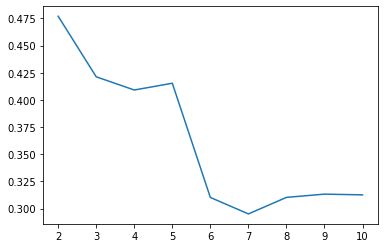

In [25]:
plt.plot(sil[0], sil[1]);

In [26]:
# SSD: Elbow

ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df_2)
    ssd.append([k, kmean.inertia_])
ssd

[[2, 847.8873449574529],
 [3, 559.2246605761833],
 [4, 449.0285336336651],
 [5, 369.0042216309887],
 [6, 325.9735477352669],
 [7, 289.0799677347872],
 [8, 265.32583508075027],
 [9, 245.09355592981703],
 [10, 220.78027160456827]]

In [27]:
ssd = pd.DataFrame(ssd)
ssd

0           1
0   2  847.887345
1   3  559.224661
2   4  449.028534
3   5  369.004222
4   6  325.973548
5   7  289.079968
6   8  265.325835
7   9  245.093556
8  10  220.780272

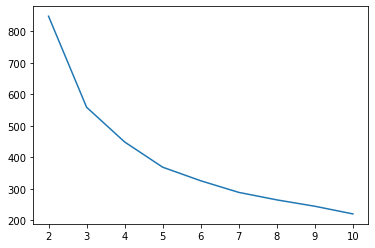

In [28]:
plt.plot(ssd[0],ssd[1]);

# Final KMeans with K==3

In [29]:
# K=3

kmeans =KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(df_2)

KMeans(n_clusters=3, random_state=0)

In [30]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [31]:
df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  
0       9.44        56.2       5.82    553.0  
1       4.49        76.3       1.65   4090.0  
2      16.10        76.5       2.89   4460.0  
3      22.40        60.1       6.16   3530.0  
4       1.44        76.8       2.13  12200.0

In [32]:
# We will assign the label to the main data(original data)
# Now we will be perfroming cluster Profiling

df['label'] = kmeans.labels_

In [33]:
df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  label  
0       9.44        56.2       5.82    553.0      0  
1       4.49        76.3       1.65   4090.0      2  
2      16.10        76.5       2.89   4460.0      2  
3      22.40        60.1       6.16   3530.0      0  
4       1.44        76.8       2.13  12200.0      2

In [34]:
## Find the label wise count of observations
df['label'].value_counts()

2    90
0    48
1    29
Name: label, dtype: int64

In [35]:
# As mentioned that the analysis(Segmentation) should be done based on the below columns
df_final = df[[D]]
df_final.head()

gdpp  child_mort   income
0    553.0        90.2   1610.0
1   4090.0        16.6   9930.0
2   4460.0        27.3  12900.0
3   3530.0       119.0   5900.0
4  12200.0        10.3  19100.0

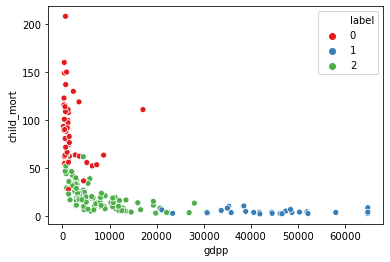

In [36]:
sns.scatterplot(x='gdpp', y='child_mort', hue='label', data=df, palette='Set1')
plt.show()

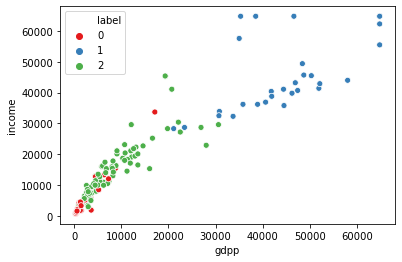

In [37]:
sns.scatterplot(x='gdpp', y='income', hue='label', data=df, palette='Set1')
plt.show()

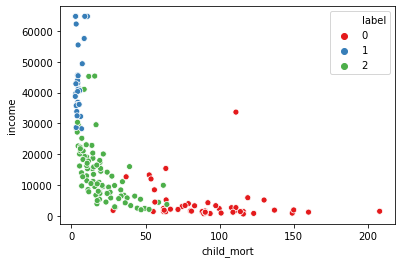

In [38]:
sns.scatterplot(x='child_mort', y='income', hue='label', data=df, palette='Set1')
plt.show()

## Cluster Profiling

It's a method or an approach to understand the property of the clusters that we have.

In [39]:
df.groupby("label")[['gdpp','child_mort','income']].mean()

gdpp  child_mort        income
label                                        
0       1909.208333   91.610417   3897.354167
1      44554.380690    4.982759  45278.320690
2       7808.577778   20.547778  13804.333333

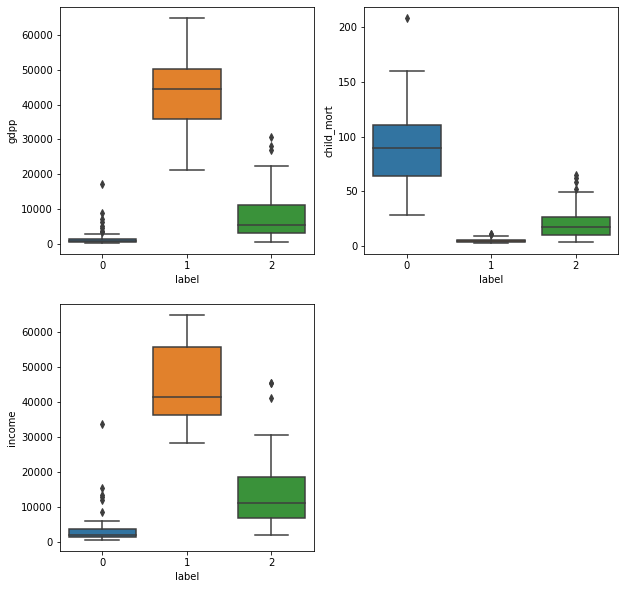

In [40]:
plt.figure(figsize = (10,10))
for i in enumerate(df_final.columns):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x = 'label', y = i[1], data = df)

In [41]:
target_cluster = df[df['label']==0]
target_cluster

country  child_mort     exports    health    imports  \
0                 Afghanistan        90.2     55.3000   41.9174    248.297   
3                      Angola       119.0   2199.1900  100.6050   1514.370   
17                      Benin       111.0    180.4040   31.0780    281.976   
21                   Botswana        52.5   2768.6000  527.0500   3257.550   
25               Burkina Faso       116.0    110.4000   38.7550    170.200   
26                    Burundi        93.6     20.6052   26.7960     90.552   
28                   Cameroon       108.0    290.8200   67.2030    353.700   
31   Central African Republic       149.0     52.6280   17.7508    118.190   
32                       Chad       150.0    330.0960   40.6341    390.195   
36                    Comoros        88.2    126.8850   34.6819    397.573   
37           Congo, Dem. Rep.       116.0    137.2740   26.4194    165.664   
38                Congo, Rep.        63.9   2331.7400   67.4040   1498.780   
40              Cote d'Ivoire       111.0    617.3200   64.6600    528.260   
49          Equatorial Guinea       111.0  14671.8000  766.0800  10071.900   
50                    Eritrea        55.2     23.0878   12.8212    112.306   
55                      Gabon        63.7   5048.7500  306.2500   1653.750   
56                     Gambia        80.3    133.7560   31.9778    239.974   
59                      Ghana        74.7    386.4500   68.3820    601.290   
63                     Guinea       109.0    196.3440   31.9464    279.936   
64              Guinea-Bissau       114.0     81.5030   46.4950    192.544   
66                      Haiti       208.0    101.2860   45.7442    428.314   
72                       Iraq        36.9   1773.0000  378.4500   1534.500   
80                      Kenya        62.2    200.1690   45.9325    324.912   
81                   Kiribati        62.7    198.1700  168.3700   1190.510   
84                        Lao        78.9    403.5600   50.9580    562.020   
87                    Lesotho        99.7    460.9800  129.8700   1181.700   
88                    Liberia        89.3     62.4570   38.5860    302.802   
93                 Madagascar        62.2    103.2500   15.5701    177.590   
94                     Malawi        90.5    104.6520   30.2481    160.191   
97                       Mali       137.0    161.4240   35.2584    248.508   
99                 Mauritania        97.4    608.4000   52.9200    734.400   
106                Mozambique       101.0    131.9850   21.8299    193.578   
108                   Namibia        56.0   2480.8200  351.8820   3150.330   
112                     Niger       123.0     77.2560   17.9568    170.868   
113                   Nigeria       130.0    589.4900  118.1310    405.420   
116                  Pakistan        92.1    140.4000   22.8800    201.760   
126                    Rwanda        63.6     67.5600   59.1150    168.900   
129                   Senegal        66.8    249.0000   56.6000    403.000   
132              Sierra Leone       160.0     67.0320   52.2690    137.655   
136           Solomon Islands        28.1    635.9700  110.2950   1047.480   
137              South Africa        53.7   2082.0800  650.8320   1994.720   
142                     Sudan        76.7    291.5600   93.5360    254.560   
147                  Tanzania        71.9    131.2740   42.1902    204.282   
149               Timor-Leste        62.6     79.2000  328.3200   1000.800   
150                      Togo        90.3    196.1760   37.3320    279.624   
155                    Uganda        81.0    101.7450   53.6095    170.170   
165                     Yemen        56.3    393.0000   67.8580    450.640   
166                    Zambia        83.1    540.2000   85.9940    451.140   

      income  inflation  life_expec  total_fer     gdpp  label  
0     1610.0      9.440        56.2       5.82    553.0      0  
3     5900.0     22.400        60.1       6.16   3530.0      0  
17  

In [42]:
#Top 5 direst countries.
target_cluster.sort_values(by=['gdpp','child_mort','income'], ascending=[True, False, True]).head()

country  child_mort   exports   health  imports  income  \
26            Burundi        93.6   20.6052  26.7960   90.552   764.0   
88            Liberia        89.3   62.4570  38.5860  302.802   700.0   
37   Congo, Dem. Rep.       116.0  137.2740  26.4194  165.664   609.0   
112             Niger       123.0   77.2560  17.9568  170.868   814.0   
132      Sierra Leone       160.0   67.0320  52.2690  137.655  1220.0   

     inflation  life_expec  total_fer   gdpp  label  
26       12.30        57.7       6.26  231.0      0  
88        5.47        60.8       5.02  327.0      0  
37       20.80        57.5       6.54  334.0      0  
112       2.55        58.8       7.49  348.0      0  
132      17.20        55.0       5.20  399.0      0

##  Hierarchial Clustering

In [43]:
df_hierarchial = df[['gdpp','child_mort','income']]
df_hierarchial.head()

gdpp  child_mort   income
0    553.0        90.2   1610.0
1   4090.0        16.6   9930.0
2   4460.0        27.3  12900.0
3   3530.0       119.0   5900.0
4  12200.0        10.3  19100.0

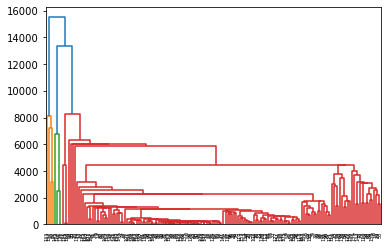

In [44]:
# single linkage
mergings = linkage(df_hierarchial, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

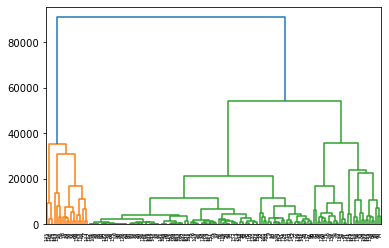

In [45]:
# complete linkage
mergings = linkage(df_hierarchial, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [46]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# assign cluster labels
df_hierarchial['cluster_labels'] = cluster_labels
df_hierarchial.head()

gdpp  child_mort   income  cluster_labels
0    553.0        90.2   1610.0               0
1   4090.0        16.6   9930.0               0
2   4460.0        27.3  12900.0               0
3   3530.0       119.0   5900.0               0
4  12200.0        10.3  19100.0               1

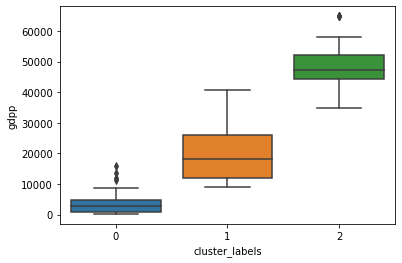

In [48]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=df_hierarchial)
plt.show()

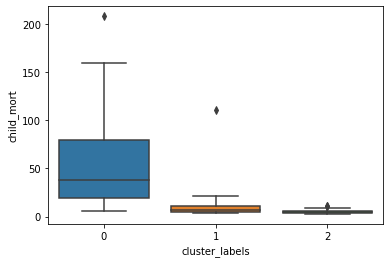

In [49]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=df_hierarchial)
plt.show()

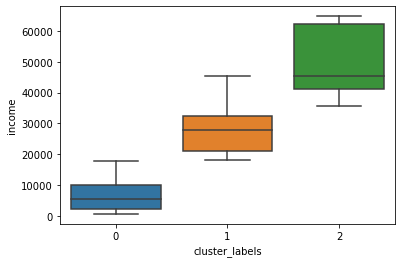

In [50]:
sns.boxplot(x='cluster_labels', y='income', data=df_hierarchial)
plt.show()